In [135]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

import warnings
warnings.filterwarnings('ignore')

In [71]:
directory = os.getcwd()
data = pd.read_csv(directory + '/EMS_2017_2018_cat_final.csv', sep=',') 

In [72]:
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,...,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,...,8.0,0,23,12,23,12,0,1,0,1
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,...,8.0,0,23,12,23,12,23,12,23,12
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,...,7.0,0,23,12,23,12,23,12,23,12
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,...,7.0,0,23,12,23,12,23,12,23,12
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,...,9.0,0,23,12,23,12,23,12,23,12


In [73]:
data = data.drop(columns = ["INCIDENT_DATETIME","FIRST_ASSIGNMENT_DATETIME","FIRST_ACTIVATION_DATETIME","FIRST_ON_SCENE_DATETIME"])

In [74]:
data.head()

,CAD_INCIDENT_ID,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,...,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
0,183654386,14,2,8,461.0,453.0,0,1,12,11201.0,...,8.0,0,23,12,23,12,0,1,0,1
1,183654358,92,2,25,328.0,303.0,0,1,12,11201.0,...,8.0,0,23,12,23,12,23,12,23,12
2,183654307,92,2,25,134.0,109.0,0,1,12,11215.0,...,7.0,0,23,12,23,12,23,12,23,12
3,183654254,81,6,11,425.0,414.0,0,1,12,11201.0,...,7.0,0,23,12,23,12,23,12,23,12
4,183654246,84,7,10,898.0,888.0,0,1,12,11215.0,...,9.0,0,23,12,23,12,23,12,23,12


In [75]:
#shuffle the data
data['r'] = np.random.random(data.shape[0]) 
data = data.sort_values(by = 'r').reset_index(drop = True)
data = data.drop('r', 1)

In [76]:
#using 100,000 rows just for this exercise - for real modeling use all data
data = data[:100000]

In [77]:
data.shape

(100000, 24)

***LINEAR REGRESSION***

Create linear regression model and fit with training dataset

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
#X is predictors, Y is value to be predicted
X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY"])
Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY"]

In [80]:
#splitting into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [111]:
X_test.head()

,CAD_INCIDENT_ID,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,...,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
51610,180812374,1,5,148,529.0,1,2,22,10033.0,34.0,...,13.0,0,14,3,14,3,14,3,14,3
74578,170710005,29,4,33,348.0,0,2,16,10121.0,14.0,...,12.0,0,0,3,0,3,0,3,0,3
3247,180420658,75,4,9,1028.0,0,3,23,11697.0,100.0,...,5.0,0,4,2,4,2,4,2,4,2
1017,171152444,20,2,14,790.0,0,2,21,10039.0,32.0,...,13.0,0,14,4,14,4,14,4,15,4
26876,173334406,13,3,19,378.0,0,0,1,10453.0,46.0,...,15.0,0,23,11,23,11,23,11,23,11


In [82]:
Y_test.head()

51610     381.0
74578     315.0
3247     1019.0
1017      776.0
26876     359.0
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [83]:
#create linear regression model
linreg = LinearRegression()
linreg = linreg.fit(X_train,Y_train) #fit model with training data

***Linear Regression Coeffs***

In [84]:
#Intercept
print(linreg.intercept_)

-2.006572685786523e-11


In [85]:
#Coefficients/Slopes for each predictor (betas)
#Need to get rid of DISPATCH_RESPONSE_SECONDS_QY & INCIDENT_RESPONSE_SECONDS_QY - they exactly predict target
a = pd.DataFrame(linreg.coef_.transpose(),columns = ["Coefficient"])
b = pd.DataFrame(X_train.columns, columns = ["Predictors"])
coeff = pd.concat([a,b],axis=1)
coeff

,Coefficient,Predictors
0,-3.712732e-20,CAD_INCIDENT_ID
1,-1.005744e-15,INITIAL_CALL_TYPE
2,1.921810e-13,INITIAL_SEVERITY_LEVEL_CODE
3,-1.000000e+00,DISPATCH_RESPONSE_SECONDS_QY
4,1.000000e+00,INCIDENT_RESPONSE_SECONDS_QY
5,-1.305259e-13,HELD_INDICATOR
6,4.101621e-14,BOROUGH
7,-6.497427e-15,INCIDENT_DISPATCH_AREA
8,2.196364e-15,ZIPCODE
9,3.301697e-16,POLICEPRECINCT


In [86]:
#R2 value
#tells us what % of the variability of our target is explained by our predictors
r_sq = linreg.score(X_test,Y_test)
r_sq

1.0

***Model Predictions***

In [87]:
#estimate predictions from model
Y_pred = linreg.predict(X_test)
Y_pred

array([ 381.,  315., 1019., ..., 1472.,  438.,  511.])

Plot real vs predicted travel times as scatterplot.

In [89]:
vals = pd.DataFrame({"Actual": Y_test,"Predicted": Y_pred})
vals.head()

,Actual,Predicted
51610,381.0,381.0
74578,315.0,315.0
3247,1019.0,1019.0
1017,776.0,776.0
26876,359.0,359.0


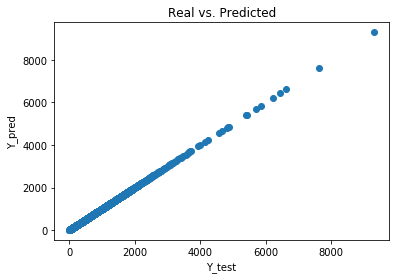

In [90]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title("Real vs. Predicted")
plt.show()

In [104]:
#compare RMSE against mean value of target var; what % greater is it? will determine how accurate our algo is

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 1.6450958462144172e-12
Mean Squared Error: 9.325613081744782e-24
Root Mean Squared Error: 3.053786679148493e-12


***RESIDUALS***

Residual = Actual - Predicted

In [105]:
vals["residuals"] = vals["Actual"]-vals["Predicted"]
vals.head()

,Actual,Predicted,residuals
51610,381.0,381.0,1.364242e-12
74578,315.0,315.0,2.160050e-12
3247,1019.0,1019.0,-3.410605e-12
1017,776.0,776.0,1.136868e-12
26876,359.0,359.0,1.364242e-12


***Best Fit Line***

In [107]:
vals["rss"] = (vals["residuals"])**2
vals.head()

,Actual,Predicted,residuals,rss
51610,381.0,381.0,1.364242e-12,1.861156e-24
74578,315.0,315.0,2.160050e-12,4.665816e-24
3247,1019.0,1019.0,-3.410605e-12,1.163223e-23
1017,776.0,776.0,1.136868e-12,1.292470e-24
26876,359.0,359.0,1.364242e-12,1.861156e-24


In [128]:
#line created by min RSS value of all tests
y_eq = linreg.intercept_ +linreg.coef_ *X_test.loc[vals["rss"].idxmin()]

In [129]:
y_eq

CAD_INCIDENT_ID                -2.638125e-11
INITIAL_CALL_TYPE              -2.014719e-11
INITIAL_SEVERITY_LEVEL_CODE    -1.891264e-11
DISPATCH_RESPONSE_SECONDS_QY   -3.400000e+01
INCIDENT_RESPONSE_SECONDS_QY    6.770000e+02
HELD_INDICATOR                 -2.006573e-11
BOROUGH                        -2.006573e-11
INCIDENT_DISPATCH_AREA         -2.006573e-11
ZIPCODE                         2.897263e-12
POLICEPRECINCT                 -2.005252e-11
CITYCOUNCILDISTRICT            -2.006566e-11
COMMUNITYDISTRICT              -1.990506e-11
COMMUNITYSCHOOLDISTRICT        -2.007094e-11
CONGRESSIONALDISTRICT          -2.005613e-11
TRANSFER_INDICATOR             -2.006573e-11
INCIDENT_Hour                  -2.005204e-11
INCIDENT_Month                 -2.003952e-11
FIRST_ASSIGNMENT_Hour          -2.008476e-11
FIRST_ASSIGNMENT_Month         -2.003952e-11
FIRST_ACTIVATION_Hour          -2.006198e-11
FIRST_ACTIVATION_Month         -2.003952e-11
FIRST_ON_SCENE_Hour            -2.005700e-11
FIRST_ON_S

In [ ]:
#Make the eq relating each predictor to its coeff above and plot

***Distribution of Residuals***

Residuals should be approx normally distributed - they shouldn't follow a pattern. This can be inspected by plotting residuals as a histogram and/or using a probability plot.

In [93]:
from scipy import stats

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 2.5000e+01, 1.3200e+02, 2.4836e+04]),
 array([-1.65528036e-10, -1.48543933e-10, -1.31559830e-10, -1.14575727e-10,
        -9.75916237e-11, -8.06075207e-11, -6.36234176e-11, -4.66393146e-11,
        -2.96552116e-11, -1.26711086e-11,  4.31299441e-12]),
 <a list of 10 Patch objects>)

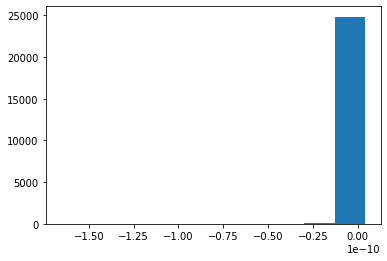

In [94]:
plt.hist(vals["residuals"])

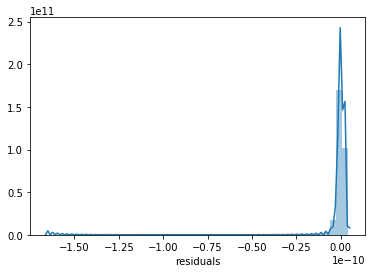

In [140]:
sns.distplot(vals["residuals"])
plt.show()

Plot residuals vs normal distribution: red line shows best-fit line for the data. Plot shows actual distr of residual quantiles and a perfectly normal distr residuals. If graph perfectly overlaying on diagonal, the residuals are normally distr.

((array([-4.03137704, -3.81788977, -3.70118272, ...,  3.70118272,
          3.81788977,  4.03137704]),
  array([-1.65528036e-10, -8.34461389e-11, -6.88942237e-11, ...,
          4.07851530e-12,  4.24549285e-12,  4.31299441e-12])),
 (2.309062144920517e-12, -5.2994284516215956e-14, 0.7561267527406553))

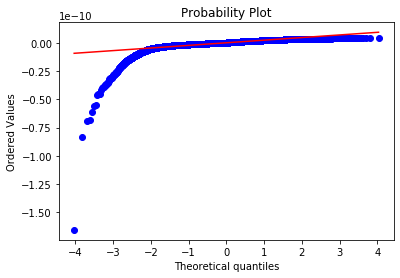

In [141]:
stats.probplot(vals["residuals"],plot=plt)

In [96]:
stats.kstest(vals["residuals"], 'norm')

KstestResult(statistic=0.4999999999982794, pvalue=0.0)

***Relationship between Residuals & Predictors***

Plot relationship between residuals and predicting variables (features in X) to look for the independence assumption. In linear regression, it is assumed that the errors (residuals of fitted model) are independent of each other. If residuals are distributed uniformly randomly around the zero x-axes and don't form specific clusters, then the assumption holds true. If the pts in a residual plot are randomly disperesed around the horiz axis, a linear reg model is appropriate for the data. There shouldn't be patterns in these.

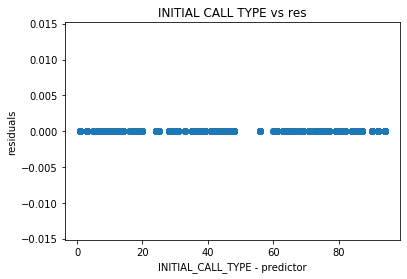

In [97]:
plt.scatter(X_test["INITIAL_CALL_TYPE"],vals["residuals"])
plt.xlabel("INITIAL_CALL_TYPE - predictor")
plt.ylabel("residuals")
plt.title("INITIAL CALL TYPE vs res")
plt.show()

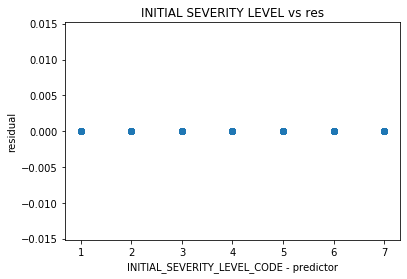

In [98]:
plt.scatter(X_test["INITIAL_SEVERITY_LEVEL_CODE"],vals["residuals"])
plt.xlabel("INITIAL_SEVERITY_LEVEL_CODE - predictor")
plt.ylabel("residual")
plt.title("INITIAL SEVERITY LEVEL vs res")
plt.show()

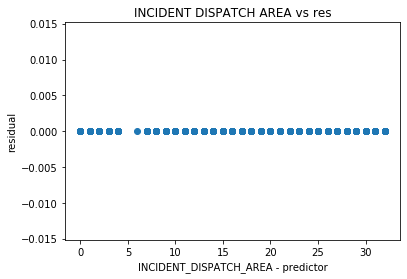

In [99]:
plt.scatter(X_test["INCIDENT_DISPATCH_AREA"],vals["residuals"])
plt.xlabel("INCIDENT_DISPATCH_AREA - predictor")
plt.ylabel("residual")
plt.title("INCIDENT DISPATCH AREA vs res")
plt.show()